# MISURAZIONE g

stimiamo il valore di g usando entrambi i periodi trovati

$T = 2\pi\sqrt{\frac{D}{g}} \Rightarrow g = \frac{4\pi^2D}{T^2}$

In [30]:
from numpy import pi as PI
from interpolazione3 import final_val

# perido ottenuto con formula
T1,sigmaT1 = 2.0026, 0.0024
# periodo ottenuto con risoluzione del sistema
T2,sigmaT2 = 2.0026, 0.0067

D = 0.994 # distanza dei coltelli del pendolo (m)

def g_T(T,sT): # g(T)
    g = 4* PI**2 * D / T**2 # calcolo g
    sg = g*2*sT/T # calcolo sigma g
    return g,sg

print('g1: ',final_val(*g_T(T1,sigmaT1),decimals=4,udm='ms-2'))
print('g2: ',final_val(*g_T(T2,sigmaT2),decimals=4,udm='ms-2'))

g1:  9.7849 ± 0.0235 ms-2
g2:  9.7849 ± 0.0655 ms-2


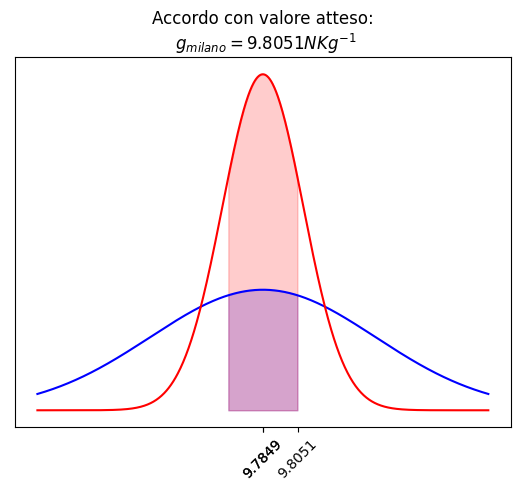

Accordo in percentuale rosso:  38.9 % >> 5%
(distanza in sigma: 0.86)

Accordo in percentuale blu:  75.6 % >> 5%
(distanza in sigma: 0.31))


In [31]:
from interpolazione3 import probability_under_norm
import matplotlib.pyplot as plt
import scipy.stats as sc
import numpy as np

g1,sg1 = 9.7849,0.0235
g2,sg2 = 9.7849,0.0655

g_milano = 9.8051 # tabulata https://www.handelskammer.bz.it/it/servizi/regolazione-del-mercato/ufficio-metrico/metrologia-legale/titolari-strumenti/strumenti-pesare/zone-di-gravit%C3%A0-e-numero-divisioni

plt.title('Accordo con valore atteso:\n $g_{milano} = 9.8051 N Kg^{-1}$')

x = np.linspace(g2-2*sg2,g2+2*sg2,1000)
B = sc.norm.pdf(x,loc=g2,scale=sg2)
plt.plot(x,B,color='blue',label='stima con risoluzione sistema')
t = np.abs(g2 - g_milano) / sg2
plt.fill_between(x=x,y1=B,where=(g2 - t*sg2 < x)&(x < g2 + t*sg2),color="blue",alpha= 0.2)

R = sc.norm.pdf(x,loc=g1,scale=sg1)
plt.plot(x,R, color='red', label='stima con formula')
t = np.abs(g1 - g_milano) / sg1
plt.fill_between(x= x,y1= R,where= (g1 - t*sg1 < x)&(x < g1 + t*sg1),color= "red",alpha= 0.2)

plt.xticks([g1,g2,g_milano],rotation=45)
plt.yticks([])
plt.show()

p = (1-probability_under_norm(g1,sg1,g_milano))*100
print('Accordo in percentuale rosso: ',p,'% >> 5%')
print(f'(distanza in sigma: {np.round(np.abs(g1 - g_milano) / sg1,2)})\n')

p = (1-probability_under_norm(g2,sg2,g_milano))*100
print('Accordo in percentuale blu: ',p,'% >> 5%')
print(f'(distanza in sigma: {np.round(np.abs(g2 - g_milano) / sg2,2)}))')